In [68]:
# Import dependencies
import json
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

In [39]:
# Read in data
file_path = "../Resources/wineQualityReds.csv"
redWine_df = pd.read_csv(file_path)
redWine_df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
# Columns
redWine_df.columns

Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [41]:
# List DataFrame data types
redWine_df.dtypes

Unnamed: 0                int64
fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [42]:
# Find null values
for column in redWine_df.columns:
    print(f"Column {column} has {redWine_df[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column fixed.acidity has 0 null values
Column volatile.acidity has 0 null values
Column citric.acid has 0 null values
Column residual.sugar has 0 null values
Column chlorides has 0 null values
Column free.sulfur.dioxide has 0 null values
Column total.sulfur.dioxide has 0 null values
Column density has 0 null values
Column pH has 0 null values
Column sulphates has 0 null values
Column alcohol has 0 null values
Column quality has 0 null values


In [43]:
# Find Duplicate entries
print(f"Duplicate entries: {redWine_df.duplicated().sum()}")

Duplicate entries: 0


In [44]:
# Drop 'Unnamed' column
redWine_df.drop(columns='Unnamed: 0', inplace=True)
redWine_df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [45]:
# Use summary statistics
redWine_df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [46]:
# Split our data into our featured matrix (X) and our target (y)
X = redWine_df.drop(columns=['quality'])
X

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [47]:
# Create target (y)
y = redWine_df['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [48]:
# View y and put in order to graph
sorted_y = y.value_counts().sort_index()
sorted_y

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

<AxesSubplot:title={'center':'Quality Distribution of Red Wine'}, xlabel='Qaulity Categories', ylabel='Number of Wines'>

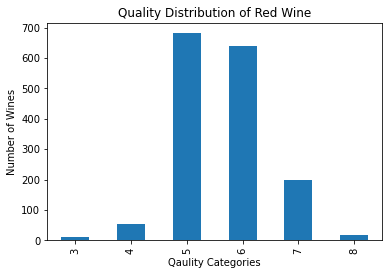

In [49]:
# Graph quality column
y_plot = sorted_y.plot(kind='bar', title='Quality Distribution of Red Wine', 
              xlabel='Qaulity Categories', ylabel='Number of Wines')
y_plot

In [50]:
# Save plot as png
y_plot.figure.savefig('../Images/red_quality_distribution.png')

In [51]:
# Create an instance of the StandardScaler
data_scaler = StandardScaler()

In [52]:
# Fit and transform X
X_scaled = data_scaler.fit_transform(X)
X_scaled

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [53]:
# Train_test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=5)

## Random Forest Classifier

In [54]:
# Create an instance of a RFC
# Model
rfc = RandomForestClassifier(n_estimators=300, random_state=5)

In [55]:
# Fit
rfc = rfc.fit(X_train, y_train)

In [56]:
# Predict
y_pred = rfc.predict(X_test)

In [57]:
# Calculate accuracy score
accuracy_score(y_test, y_pred)

0.715

In [58]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)
cm

array([[  0,   0,   1,   1,   0,   0],
       [  1,   0,   4,   6,   0,   0],
       [  0,   0, 149,  30,   0,   0],
       [  0,   0,  33, 109,   5,   1],
       [  0,   0,   4,  22,  27,   0],
       [  0,   0,   0,   4,   2,   1]])

Text(0.5, 1.0, 'Random Forest Classifier')

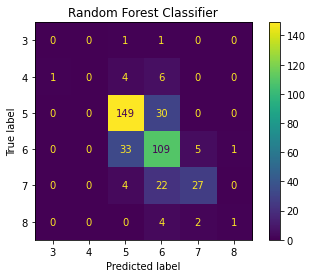

In [59]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= rfc.classes_)
disp.plot()
disp.ax_.set_title("Random Forest Classifier")

In [63]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.78      0.83      0.81       179
           6       0.63      0.74      0.68       148
           7       0.79      0.51      0.62        53
           8       0.50      0.14      0.22         7

    accuracy                           0.71       400
   macro avg       0.45      0.37      0.39       400
weighted avg       0.70      0.71      0.70       400



In [64]:
# Sort features by importance
important_features = rfc.feature_importances_

cols = X.columns

importance_df = pd.DataFrame({'feature': cols, 'importance': important_features})
importance_df

,feature,importance
0,fixed.acidity,0.075888
1,volatile.acidity,0.103499
2,citric.acid,0.074806
3,residual.sugar,0.072705
4,chlorides,0.082095
5,free.sulfur.dioxide,0.066475
6,total.sulfur.dioxide,0.107800
7,density,0.091786
8,pH,0.074196
9,sulphates,0.112539


In [66]:
# Sort in descending order
sort_import_df = importance_df.sort_values('importance', ascending=False)
sort_import_df

,feature,importance
10,alcohol,0.138212
9,sulphates,0.112539
6,total.sulfur.dioxide,0.107800
1,volatile.acidity,0.103499
7,density,0.091786
4,chlorides,0.082095
0,fixed.acidity,0.075888
2,citric.acid,0.074806
8,pH,0.074196
3,residual.sugar,0.072705


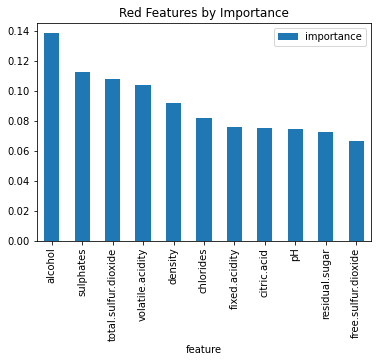

In [70]:
sort_import_df.plot(x = 'feature', y = 'importance', kind='bar', title='Red Features by Importance')
plt.show()

## Binning the Quality Column

In [71]:
# Split the 'Quality' column into High(1) and Low(0) Quality and create a new column
redWine_df['q_category'] = np.where(redWine_df['quality'] >= 5, 1, 0)
# display the dataframe
redWine_df

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,q_category
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [72]:
# Use summary statistics
redWine_df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,q_category
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.960600
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.194605
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [73]:
# Split our data into our featured matrix (X) and our target (y)
X = redWine_df.drop(columns=['quality', 'q_category'])
X

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [74]:
# Create target (y)
y = redWine_df['q_category']
y

0       1
1       1
2       1
3       1
4       1
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Name: q_category, Length: 1599, dtype: int64

In [75]:
# View y and put in order to graph
sorted_y = y.value_counts().sort_index()
sorted_y

0      63
1    1536
Name: q_category, dtype: int64

<AxesSubplot:title={'center':'Red Q_Category Distribution'}, xlabel='Qaulity Categories', ylabel='Number of Wines'>

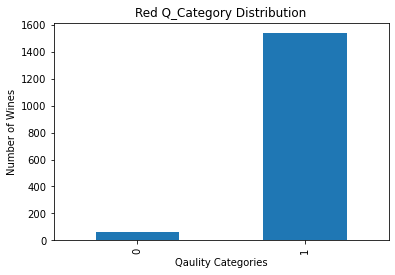

In [76]:
# Graph quality column
y_plot = sorted_y.plot(kind='bar', title='Red Q_Category Distribution', 
              xlabel='Qaulity Categories', ylabel='Number of Wines')
y_plot

In [77]:
# Create an instance of the StandardScaler
data_scaler = StandardScaler()

In [78]:
# Fit and transform X
X_scaled = data_scaler.fit_transform(X)
X_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [79]:
# Train_test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=5)

## Random Forest Classifier with Binned Target

In [80]:
# Create an instance of a RFC
# Model
rfc = RandomForestClassifier(n_estimators=300, random_state=5)

# Fit
rfc = rfc.fit(X_train, y_train)

# Predict
y_pred = rfc.predict(X_test)

In [81]:
# Calculate accuracy score
accuracy_score(y_test, y_pred)

0.965

In [82]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)
cm

array([[  0,  13],
       [  1, 386]])

Text(0.5, 1.0, 'Random Forest Classifier')

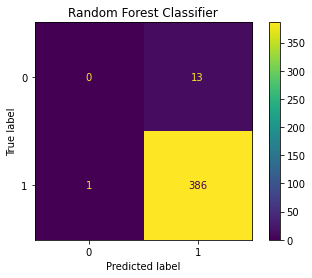

In [83]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= rfc.classes_)
disp.plot()
disp.ax_.set_title("Random Forest Classifier")

In [84]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.97      1.00      0.98       387

    accuracy                           0.96       400
   macro avg       0.48      0.50      0.49       400
weighted avg       0.94      0.96      0.95       400

